# Questão 2 - Prova 2 de Inteligência Artificial

## Lucas Nóbrega e Nathália de Vasconcelos

Enunciado: utilizando a base disponível no ​ [link](https://archive.ics.uci.edu/ml/datasets/Avila), crie os datasets a seguir:

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


Elabore uma rede neural de duas camadas para classificação do banco de
dados.
Ao fim do treinamento, avalie o desempenho da rede utilizando a matriz de
confusão com o dataset de teste e mostre o valor de acurácia.
Observações:

● Utilize apenas o arquivo ​ avila-tr.txt​ .

● A camada de saída da rede deverá conter um neurônio para cada classe.

● Utilize o dataset de validação para criar algum critério de parada no
treinamento.

Bônus: defina uma arquitetura de rede neural ou modelos de ​ deep learning que
ultrapassem 75% de acurácia.

### DATA SET DESCRIPTION 
The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

### Class distribution (training set)
* A: 4286
* B: 5  
* C: 103 
* D: 352 
* E: 1095 
* F: 1961 
* G: 446 
* H: 519
* I: 831
* W: 44
* X: 522 
* Y: 266

### ATTRIBUTE DESCRIPTION
|ID|      Name    |
|-|-|
|F1|       intercolumnar distance |
|F2|       upper margin |
|F3|       lower margin |
|F4|       exploitation |
|F5|       row number |
|F6|      modular ratio |
|F7|       interlinear spacing |
|F8|       weight |
|F9|       peak number |
|F10|     modular ratio/ interlinear spacing|
Class: A, B, C, D, E, F, G, H, I, W, X, Y


CITATIONS
If you want to refer to the Avila data set in a publication, please cite the following paper:

C. De Stefano, M. Maniaci, F. Fontanella, A. Scotto di Freca,
Reliable writer identification in medieval manuscripts through page layout features: The "Avila" Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110.


In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [3]:
import pandas as pd

In [4]:
import time

# Abrindo o arquivo de dados

In [5]:
dataset = pd.read_csv('./avila/avila-tr.txt', header = None)


# Percebendo o _outlier_ na coluna 1

In [6]:
a = dataset.loc[dataset[1] == 386]

In [7]:
a

,0,1,2,3,4,5,6,7,8,9,10
6619,0.0,386.0,50.0,0.168104,0.0,53.0,83.0,0.275032,44.0,0.63802,A


In [8]:
aux = np.array(dataset[1])
dataset[1] = dataset[1].replace(386, np.nanmedian(aux))

In [9]:
dataset.loc[dataset[1] == 386]

,0,1,2,3,4,5,6,7,8,9,10


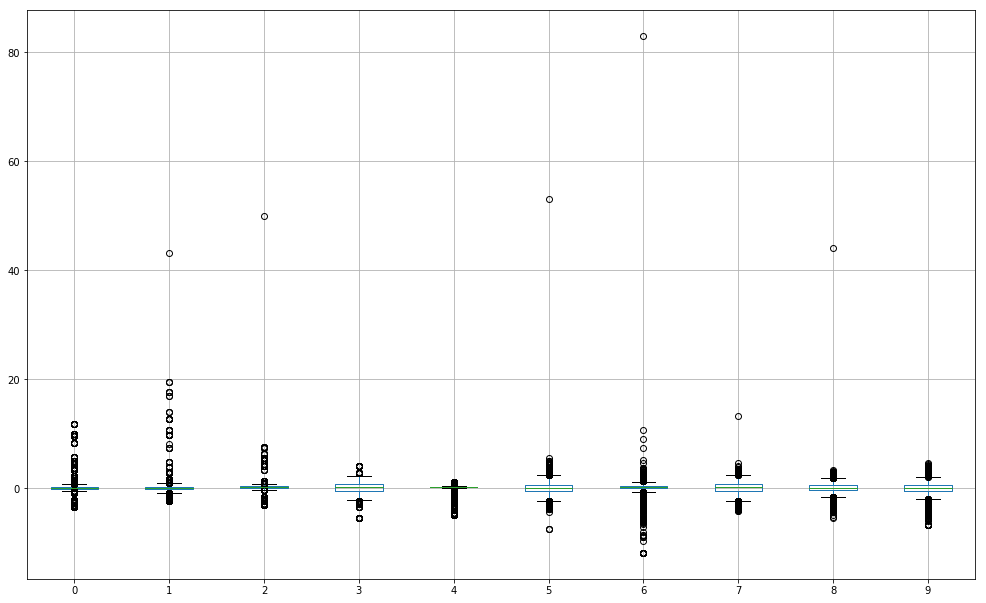

In [10]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [11]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.003403,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,1.042894,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,43.133656,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [12]:
b = np.array(dataset[6])

In [13]:
b

array([ 0.371178,  1.46594 , -0.081827, ...,  0.295677,  0.069175,
        0.786433])

In [14]:
np.max(b)

83.0

In [15]:
for i in [1, 2, 5, 6, 7, 8]:
    aux = np.array(dataset[i])
    dataset[i] = dataset[i].replace(np.max(aux), np.nanmedian(aux))

In [16]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.007544,-0.005298,-0.002387,0.006370,0.008886,-0.002331,0.009070,0.008702,0.000818
std,0.991431,0.953512,1.007528,1.008527,0.992053,0.999600,1.032191,0.995195,0.998735,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111778,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654886,0.500624,0.530855
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


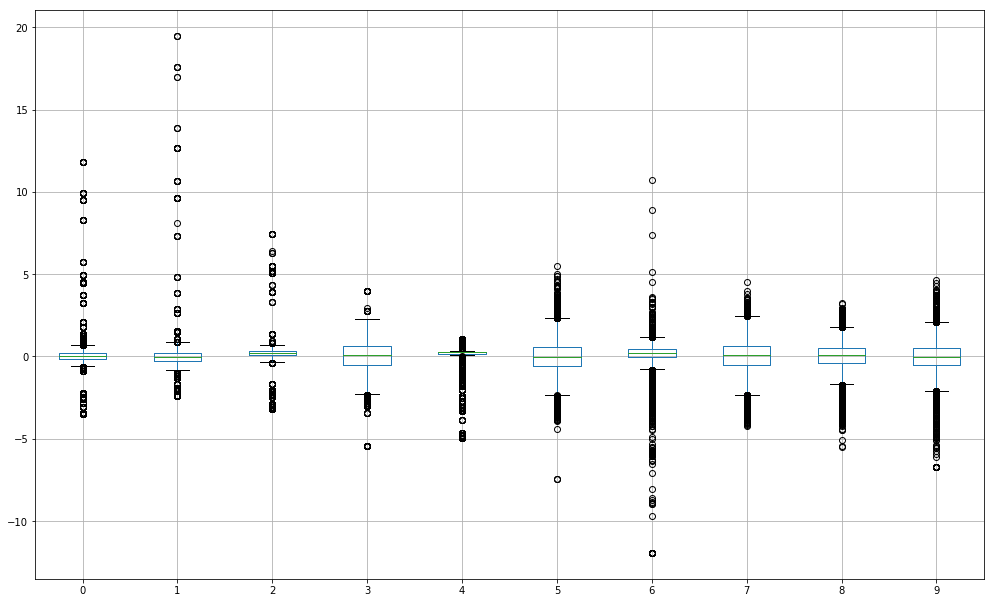

In [17]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

# Mudando os _labels_ das classes

In [59]:
classes_number = [i for i in range(12)]
classes_charcteres = ["A","B","C","D","E","F","G","H","I","W","X","Y"]
dictionary_classes = dict(zip(classes_charcteres, classes_number))
dictionary_classes

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'W': 9,
 'X': 10,
 'Y': 11}

In [60]:
for key in dictionary_classes:
    #print(key, dictionary_classes[key])
    dataset[10] = dataset[10].replace(key, dictionary_classes[key])

In [20]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [21]:
X

array([[ 2.660740e-01, -1.656200e-01,  3.209800e-01, ...,  9.298230e-01,
         2.511730e-01,  1.593450e-01],
       [ 1.302920e-01,  8.707360e-01, -3.210528e+00, ...,  6.362030e-01,
         2.823540e-01,  5.155870e-01],
       [-1.165850e-01,  6.991500e-02,  6.847600e-02, ..., -8.882360e-01,
        -1.230050e-01,  5.829390e-01],
       ...,
       [ 2.290430e-01, -7.450000e-04,  1.716110e-01, ..., -1.088486e+00,
        -5.907270e-01,  5.801420e-01],
       [-3.017430e-01,  3.525580e-01,  2.889730e-01, ...,  5.027610e-01,
         6.253500e-01,  7.189690e-01],
       [-1.042410e-01, -1.037102e+00,  3.885520e-01, ..., -1.337547e+00,
         9.995280e-01, -5.510630e-01]])

In [22]:
y

array([ 0,  0,  0, ...,  0,  4, 10])

In [23]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.007544,-0.005298,-0.002387,0.006370,0.008886,-0.002331,0.009070,0.008702,0.000818,3.542761
std,0.991431,0.953512,1.007528,1.008527,0.992053,0.999600,1.032191,0.995195,0.998735,1.007094,3.418046
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324,0.000000
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097,0.000000
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111778,0.064084,-0.034513,4.000000
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654886,0.500624,0.530855,6.000000
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232,11.000000


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
0     10430 non-null float64
1     10430 non-null float64
2     10430 non-null float64
3     10430 non-null float64
4     10430 non-null float64
5     10430 non-null float64
6     10430 non-null float64
7     10430 non-null float64
8     10430 non-null float64
9     10430 non-null float64
10    10430 non-null int64
dtypes: float64(10), int64(1)
memory usage: 896.4 KB


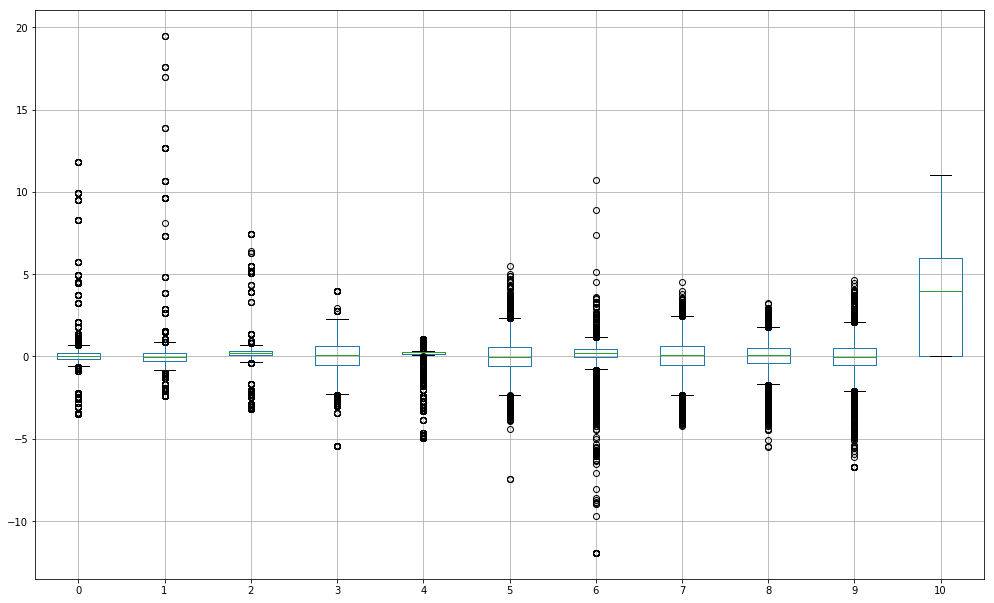

In [25]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

dataset.boxplot()

# One Hot Encoding

In [26]:
#from numpy import array
#from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = np.array(y)
values = np.array(data)
print("Values: ", values, values.shape)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("integer_encoded:", integer_encoded, integer_encoded.shape)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("onehot_encoded:", onehot_encoded,  onehot_encoded.shape)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print("inverted:", inverted)

Values:  [ 0  0  0 ...  0  4 10] (10430,)
integer_encoded: [ 0  0  0 ...  0  4 10] (10430,)
onehot_encoded: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] (10430, 12)
inverted: [0]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
print(onehot_encoded[4], values[4])
print(onehot_encoded[43], values[43])
print(onehot_encoded[440], values[440])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 5
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0


# Split Train Test

In [28]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, test_size = 0.2)

In [29]:
X_test, X_test.shape

(array([[ 0.25373 ,  0.219088,  0.14316 , ...,  0.70505 ,  0.282354,
         -0.058985],
        [ 0.043885,  0.030659,  0.537921, ..., -2.868103, -2.399252,
         -0.236292],
        [ 0.846235,  0.014957, -0.052442, ...,  0.823213, -0.060642,
          0.345332],
        ...,
        [ 0.401857, -0.267686,  0.299642, ..., -0.262885, -0.216549,
         -1.034233],
        [ 0.080916, -0.291239,  0.356544, ...,  0.137538,  0.064084,
          0.160925],
        [ 0.290762, -0.267686,  0.324537, ..., -1.683045, -1.245538,
         -0.878131]]), (2086, 10))

In [30]:
X_train, X_train.shape

(array([[ 0.105604, -0.377602,  0.260522, ..., -0.042171, -0.310094,
          0.37582 ],
        [ 0.068573, -0.189174, -2.090261, ..., -1.607422, -0.840179,
          0.854348],
        [ 0.031541, -0.118513,  0.374326, ...,  0.634922,  0.531806,
         -0.337808],
        ...,
        [-0.32643 , -0.652394,  0.384996, ..., -1.693859, -0.684271,
         -1.329463],
        [-0.215336,  0.360409,  0.096927, ..., -3.734535, -3.740056,
         -2.861803],
        [-0.314087,  0.164129,  0.200063, ...,  0.397588,  0.843621,
         -0.053946]]), (8344, 10))

In [31]:
print(y_train, y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (8344, 12)


In [32]:
print(y_test, y_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] (2086, 12)


# StandardScaler


In [33]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train, X_train.shape

(array([[ 0.10925355, -0.38996106,  0.26431846, ..., -0.04738328,
         -0.31530601,  0.37001638],
        [ 0.07136208, -0.18661415, -2.07559156, ..., -1.6133897 ,
         -0.84474173,  0.84380651],
        [ 0.03346959, -0.11035852,  0.37759609, ...,  0.6300365 ,
          0.52556277, -0.33654605],
        ...,
        [-0.33281938, -0.68650989,  0.38821674, ..., -1.69986842,
         -0.6890247 , -1.31838275],
        [-0.21914395,  0.40648244,  0.10148013, ..., -3.74152929,
         -3.74106677, -2.83555117],
        [-0.32018958,  0.19466184,  0.2041391 , ...,  0.39258796,
          0.83699584, -0.05549454]]), (8344, 10))

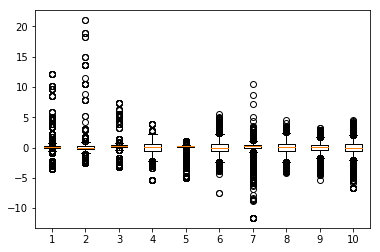

In [35]:
plt.boxplot(X_train)
plt.show()

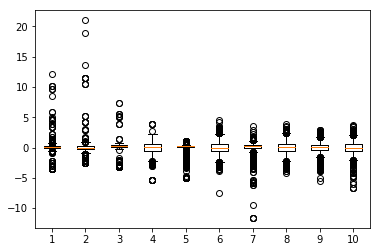

In [36]:
plt.boxplot(X_test)
plt.show()

In [37]:
X_test, X_test.shape

(array([[ 0.26082147,  0.25397226,  0.14749929, ...,  0.70019835,
          0.27641632, -0.06048365],
        [ 0.04610042,  0.05062427,  0.54043442, ..., -2.87467913,
         -2.40190508, -0.23603515],
        [ 0.86709419,  0.03367905, -0.047198  , ...,  0.81841838,
         -0.06615956,  0.33983024],
        ...,
        [ 0.41239042, -0.27134239,  0.30325752, ..., -0.2682038 ,
         -0.22187559, -1.0260758 ],
        [ 0.08399189, -0.29676021,  0.35989634, ...,  0.13241245,
          0.05841367,  0.15724904],
        [ 0.29871397, -0.27134239,  0.32803738, ..., -1.6890492 ,
         -1.24960422, -0.87151935]]), (2086, 10))

import sklearn
a = sklearn.preprocessing.normalize(y_train.reshape(1,-1))
print(a)
print(y_train)

y_train = a.reshape(-1,1)

# Keras

In [38]:
del(classifier)

NameError: name 'classifier' is not defined

In [39]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.utils.vis_utils import plot_model
import datetime

Using TensorFlow backend.


In [40]:
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(128, activation="relu"))

# Prevent Overfitting
#classifier.add(Dropout(0.01))

# Adding the input layer and the first hidden layer
classifier.add(Dense(128, activation="relu"))

classifier.add(Dense(128, activation="relu"))

# Adding the output layer
classifier.add(Dense(12, activation="softmax"))

In [41]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy', ])

plot_model(classifier, to_file='classifier_fig.png', show_shapes=True, show_layer_names=True)

In [42]:
name_logs = "logs/{}".format(datetime.datetime.now())
name_logs.replace(" ", "_")

'logs/2018-10-24_16:45:11.360737'

name_logs = "logs/{}".format(time.time())
name_logs

In [43]:
tbCallBack = TensorBoard(log_dir=name_logs)

In [44]:
X_train.shape, y_train.shape

((8344, 10), (8344, 12))

In [45]:
# Fitting our model 
classifier.fit(X_train, y_train, epochs=10, validation_split=0.2 , verbose=1, callbacks=[tbCallBack])

Train on 6675 samples, validate on 1669 samples
Epoch 1/10
6675/6675 [==============================] - 1s 78us/step - loss: 1.4526 - acc: 0.5260 - val_loss: 1.1176 - val_acc: 0.6345
Epoch 2/10
6675/6675 [==============================] - 0s 66us/step - loss: 0.9999 - acc: 0.6403 - val_loss: 0.9257 - val_acc: 0.6824
Epoch 3/10
6675/6675 [==============================] - 1s 155us/step - loss: 0.8607 - acc: 0.6837 - val_loss: 0.8600 - val_acc: 0.6860
Epoch 4/10
6675/6675 [==============================] - 1s 147us/step - loss: 0.7749 - acc: 0.7085 - val_loss: 0.7785 - val_acc: 0.7190
Epoch 5/10
6675/6675 [==============================] - 1s 146us/step - loss: 0.7119 - acc: 0.7264 - val_loss: 0.7343 - val_acc: 0.7346
Epoch 6/10
6675/6675 [==============================] - 1s 146us/step - loss: 0.6635 - acc: 0.7417 - val_loss: 0.7034 - val_acc: 0.7478
Epoch 7/10
6675/6675 [==============================] - 1s 149us/step - loss: 0.6293 - acc: 0.7569 - val_loss: 0.6634 - val_acc: 0.7555
Ep

mudar o y, e se continuar, ai mudo o X

In [47]:
classifier.evaluate(X_test, y_test)

2086/2086 [==============================] - 0s 58us/step


[0.5958338695598815, 0.7794822626465919]

# Matriz de Confusão

Para fazer a matriz de confusão precisa de 3 arrays:

* `X_test` que contém os valores dos atributos
* `y_pred` que contém os valores previstos pela rede (1D)
* `y_test` que contém os valores reais que se correlacionam com `X_test` (1D)

Porém o `y_pred` e o `y_test` estão no formato de One Hot Encoding, então precisamos convertê-lo para o original

Predizendo os valores a partir de `X_test`

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
inverted_y_pred = list()
for i in range(len(y_pred)):
    inverted_y_pred.append(int(label_encoder.inverse_transform([np.argmax(y_pred[i])])))
print("inverted len:", len(inverted_y_pred))
print("y_pred: ", y_pred, y_pred.shape)

inverted len: 2086
y_pred:  [[9.3527585e-01 1.0944615e-09 1.8375186e-10 ... 5.2631613e-08
  8.8758320e-08 9.1859656e-06]
 [2.7023306e-01 1.1265412e-05 1.0592213e-01 ... 7.5425742e-06
  5.4784901e-03 1.8279465e-03]
 [9.9761331e-01 8.0346693e-14 1.5236991e-15 ... 1.7420621e-11
  6.2716982e-10 5.2377775e-08]
 ...
 [1.7761849e-02 2.0880641e-11 5.0419027e-07 ... 3.5357162e-10
  2.8473224e-07 1.1180089e-05]
 [4.6943957e-01 3.3017017e-10 1.2148588e-06 ... 1.2733146e-07
  8.7653422e-07 3.6789948e-05]
 [8.8301194e-01 3.2657232e-07 8.5315274e-05 ... 1.6526712e-05
  4.9535622e-04 3.7547154e-05]] (2086, 12)


In [50]:
inverted_y_test = list()
for i in range(len(y_test)):
    inverted_y_test.append(int(label_encoder.inverse_transform([np.argmax(y_test[i])])))
print("inverted len:", len(inverted_y_test))
print("y_pred: ", y_test, y_test.shape)

inverted len: 2086
y_pred:  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] (2086, 12)


In [51]:
y_test[5]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [52]:
y_pred[0, :]

array([9.3527585e-01, 1.0944615e-09, 1.8375186e-10, 7.2737438e-09,
       3.7822156e-07, 5.9911218e-02, 1.7058541e-03, 2.9904556e-03,
       1.0691253e-04, 5.2631613e-08, 8.8758320e-08, 9.1859656e-06],
      dtype=float32)

In [53]:
inverted = label_encoder.inverse_transform([np.argmax(y_pred[0, :])]) #onehot_encoded[0, :])])
print("inverted:", inverted)

inverted: [0]


In [54]:
y_pred[1]

array([2.7023306e-01, 1.1265412e-05, 1.0592213e-01, 2.8114537e-02,
       4.4854948e-01, 7.7703059e-02, 3.1717092e-04, 6.1383709e-02,
       4.5162943e-04, 7.5425742e-06, 5.4784901e-03, 1.8279465e-03],
      dtype=float32)

In [55]:
y_test[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
from sklearn.metrics import confusion_matrix

# Sintaxe da função
# sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
matrix = confusion_matrix(inverted_y_test, inverted_y_pred)
matrix

array([[727,   0,   1,   5,  98,   9,   5,   0,   0,   4,   1],
       [  5,   7,   2,   6,   1,   0,   1,   0,   0,   0,   0],
       [  5,   0,  25,  22,  19,   1,   0,   0,   0,   0,   0],
       [ 23,   1,   4, 143,  14,   5,   4,   0,   1,   7,   0],
       [101,   0,   0,   4, 282,   7,   3,   0,   0,   0,   0],
       [ 16,   0,   0,   2,  16,  55,   2,   0,   0,   0,   1],
       [ 17,   0,   0,   4,   8,   7,  66,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0, 175,   1,   0,   0],
       [  1,   0,   0,   2,   0,   0,   0,   0,   8,   0,   0],
       [  1,   0,   1,   1,   0,   0,   0,   0,   0,  99,   3],
       [  3,   0,   0,   2,   1,   2,   0,   0,   0,   6,  39]])

By definition a confusion matrix _*C*_ is such that _*Ci,j*_ is equal to the number of observations known to be in group _*i*_ but predicted to be in group _*j*_ .

Ou seja, as linhas são os grupos verdadeiros e as colunas são as classes previstas

In [57]:
import seaborn

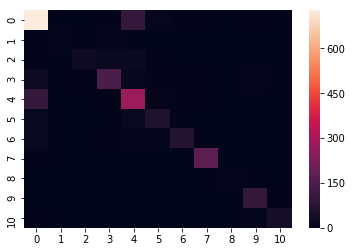

In [58]:
seaborn.heatmap(matrix)

# Resultados

Com a realização do método acima temos que a classe A deixou a rede muito tendenciosa.